In [2]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
import glob
import dask.array as da
import datetime as dt

In [3]:
# ind=(mm==(im-1)%12)|(mm==im)|(mm==(im+1)%12) # 3 month groups running mean

In [4]:
f=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/sst_HC_l0_1991_2020.nc')

In [6]:
# ensemble members 1-20 = GEM5.2-NEMO
# ensemble members 21-40 = CanESM5
GN=f.sst.isel(M=slice(0,20))
C5=f.sst.isel(M=slice(20,40))

In [7]:
GN_Emean=GN.mean(dim='M',keepdims=True)

In [8]:
C5_Emean=C5.mean(dim='M',keepdims=True)

In [9]:
nt,nm,ny,nx=np.shape(C5)
nt,nm,ny,nx

(108, 20, 180, 360)

In [10]:
GN_clim=da.zeros((12,1,ny,nx))
C5_clim=da.zeros((12,1,ny,nx))

In [13]:
GN_clim

dask.array<zeros_like, shape=(12, 1, 180, 360), dtype=float64, chunksize=(12, 1, 180, 360), chunktype=numpy.ndarray>

In [16]:
print(dt.datetime.now())
for im in range(0,12):
    GN_clim[im,...]=GN_Emean.isel(S=slice(im,-1,12)).mean(dim='S').compute()
    C5_clim[im,...]=C5_Emean.isel(S=slice(im,-1,12)).mean(dim='S').compute()
    print(dt.datetime.now())

2024-08-12 23:05:53.227437
2024-08-12 23:05:53.233827
2024-08-12 23:05:53.238799
2024-08-12 23:05:53.243733
2024-08-12 23:05:53.248511
2024-08-12 23:05:53.253294
2024-08-12 23:05:53.258094
2024-08-12 23:05:53.262868
2024-08-12 23:05:53.267788
2024-08-12 23:05:53.272526
2024-08-12 23:05:53.277395
2024-08-12 23:05:53.282179
2024-08-12 23:05:53.286662


In [17]:
GN_clim

dask.array<setitem, shape=(12, 1, 180, 360), dtype=float64, chunksize=(12, 1, 180, 360), chunktype=numpy.ndarray>

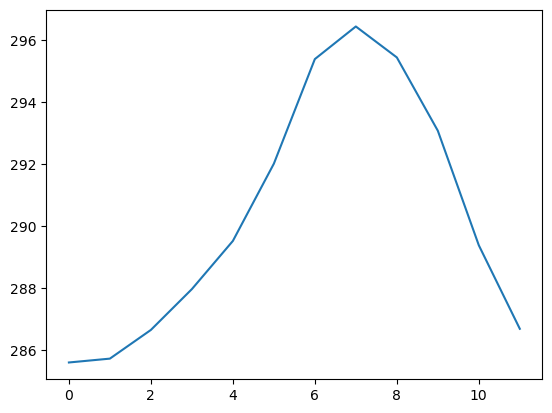

In [18]:
plt.plot(GN_clim[:,0,120,100])

In [19]:
print(dt.datetime.now())
GNanom=GN-da.tile(GN_clim,(int(nt/12),nm,1,1))
print(dt.datetime.now())

2024-08-12 23:58:46.014684
2024-08-12 23:58:46.830415


In [20]:
C5anom=GN-da.tile(C5_clim,(int(nt/12),nm,1,1))
print(dt.datetime.now())

2024-08-12 23:58:47.643124


In [21]:
GNanom

<xarray.DataArray (S: 108, M: 20, Y: 180, X: 360)> Size: 1GB
dask.array<subtract, shape=(108, 20, 180, 360), dtype=float64, chunksize=(12, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * M        (M) int64 160B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * S        (S) int64 864B 252 253 254 255 256 257 ... 354 355 356 357 358 359
Dimensions without coordinates: Y, X

In [22]:
GNanom.shape

(108, 20, 180, 360)

In [23]:
vec=GNanom[:,5,100,100].values
vec

array([ 0.53988647,  0.56918335,  0.11157227, -0.03186035,  0.40341187,
        0.24353027,  0.14608765,  0.10842896, -0.05993652,  0.03637695,
        0.35852051,  0.23287964, -0.22717285,  0.13952637, -0.17132568,
        0.29400635,  0.0736084 , -0.00457764,  0.13122559,  0.11856079,
       -0.07092285, -0.70648193, -0.51568604, -0.2204895 ,  0.16241455,
       -0.37802124, -0.79971313, -0.29260254, -0.02069092,  0.1541748 ,
       -0.17059326,  0.00732422,  0.04388428,  0.49145508,  0.62591553,
        0.18887329,  0.52548218,  0.3371582 ,  0.00952148, -0.00219727,
       -0.28839111, -0.19802856, -0.56481934, -0.62088013, -0.64459229,
        0.64871216, -0.01907349,  0.36203003,  0.12060547, -0.38006592,
       -0.03845215, -0.02819824, -0.22738647, -0.02468872,  0.53533936,
        0.45385742, -0.2164917 , -0.00967407, -0.14752197, -0.63885498,
       -0.45452881, -0.69387817, -0.65170288, -0.5970459 , -0.6774292 ,
       -0.06570435,  0.18121338, -0.02862549, -0.18771362,  0.03

In [ ]:
N=len(vec)
X=np.concatenate([np.ones((N,1)), np.expand_dims(np.arange(0,N),1)],1)
p=np.polyfit(np.arange(0,N),vec,1)
vec2=vec-p[0]*np.arange(0,N)
plt.plot(vec,'b.')
plt.plot(vec2,'r.')

In [40]:
GNanom

<xarray.DataArray (S: 108, M: 20, Y: 180, X: 360)> Size: 1GB
dask.array<subtract, shape=(108, 20, 180, 360), dtype=float64, chunksize=(12, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * M        (M) int64 160B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * S        (S) int64 864B 252 253 254 255 256 257 ... 354 355 356 357 358 359
Dimensions without coordinates: Y, X

In [44]:
GNanom.data.shape

(108, 20, 180, 360)

In [41]:
def _detrend_1d(vec):
    print(vec)
    if np.sum(~np.isnan(vec))>0:
        print(vec)
        x=np.arange(0,len(vec))
        p=np.polyfit(x,vec,1)
        return vec-p[0]*x
    else:
        return vec

In [45]:
def test(vec):
    return vec[0]

In [46]:
testout=da.apply_along_axis(test,0,GNanom.data)

In [47]:
testout

dask.array<test-along-axis, shape=(20, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>

In [43]:
GNanom_detr=da.apply_along_axis(_detrend_1d,0,GNanom.data)
print(dt.datetime.now())
C5anom_detr=da.apply_along_axis(_detrend_1d,0,C5anom.data)
print(dt.datetime.now())

[1.]
[1.]


SystemError: <class 'numpy.linalg.LinAlgError'> returned a result with an error set